<a href="https://colab.research.google.com/github/YuliiaChorna1/DataScience-03.2-Model-Training-Retraining-Sklearn/blob/main/linear_models_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Лінійна регресія

#### Генерування даних

In [3]:
data, target, coef = datasets.make_regression(n_features=2, n_informative=1, n_targets=1,
                                              noise=5., coef=True, random_state=2)

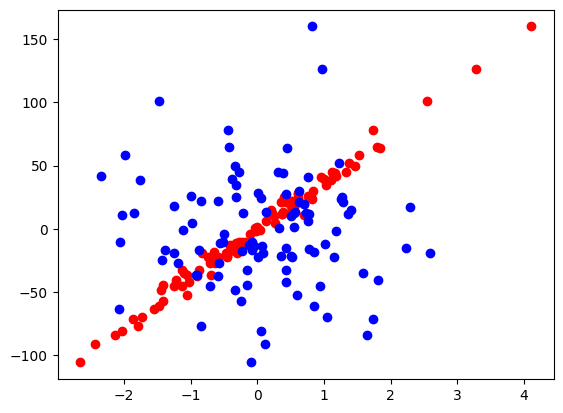

In [4]:
pylab.scatter(data[:,0], target, color="r")
pylab.scatter(data[:,1], target, color="b")

In [5]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,
                                                                                     test_size=0.3)

#### LinearRegression

In [6]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [7]:
print(test_labels)

[ -44.51417742 -105.77758163   64.70214251   23.87701013   12.47089016
  -36.44717565    1.72644759  -42.44469577   29.8208999    41.1068411
  -16.79027112   17.64282734  -61.47026695  -17.27897399  -10.06708677
  -24.77820218  -18.86438755  -37.31870104  -18.57607726   20.87713077
  126.64909941   12.67156468   41.95683853   64.19559505   24.82763821
   13.02656201  -45.27502383    0.34799656  -32.71074998  -57.46293828]


In [8]:
print(predictions)

[-5.56104433e+01 -1.03588652e+02  6.88495909e+01  3.22934240e+01
  2.03464806e+01 -4.19635844e+01 -9.56823027e-02 -3.97668567e+01
  3.21187365e+01  3.72852763e+01 -1.50218369e+01  2.23048027e+01
 -5.74041164e+01 -1.36870474e+01 -1.04653724e+01 -2.75262053e+01
 -1.93017510e+01 -3.57409332e+01 -2.52523146e+01  1.38763017e+01
  1.27330055e+02  1.42157120e+01  4.37313726e+01  7.10125644e+01
  3.13121046e+01  1.89705164e+01 -4.85469674e+01 -1.75624722e+00
 -4.40985029e+01 -5.55742632e+01]


In [9]:
metrics.mean_absolute_error(test_labels, predictions)

4.156168113403243

In [10]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring="neg_mean_absolute_error", cv=10)
print(f"mean: {linear_scoring.mean()}, std: {linear_scoring.std()}")

mean: -4.070071498779697, std: 1.0737104492890197


In [11]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [12]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, cv=10)
print(f"mean: {linear_scoring.mean()}, std: {linear_scoring.std()}")

mean: 4.070071498779697, std: 1.0737104492890197


In [13]:
coef

array([38.07925837,  0.        ])

In [14]:
linear_regressor.coef_

array([38.77647582,  0.58143037])

In [15]:
linear_regressor.intercept_

-0.4114010770346388

In [16]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [17]:
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0],
                                                  linear_regressor.coef_[1],
                                                  linear_regressor.intercept_))

y = 38.78*x1 + 0.58*x2 + -0.41


#### Lasso

In [18]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [19]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print("mean: {lasso_scoring.mean()}, std: {lasso_scoring.std()}")

mean: {lasso_scoring.mean()}, std: {lasso_scoring.std()}


In [20]:
print(lasso_regressor.coef_)

[37.8550177  0.       ]


In [21]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [22]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

y = 37.86*x1 + 0.00*x2
